In [ ]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import os.path as osp

In [ ]:
from random import randint
import random

In [ ]:
xml_src = glob.glob("../bdd100k/bdd100k/xml/train/*.xml")

In [ ]:
num_imgs = 0
person_img_names = []

for xml_path in xml_src:
    
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person": 
                num_imgs += 1
                
                img_basename = os.path.basename(xml_path)
                img_onlyname = os.path.splitext(img_basename)
                person_img_names.append(img_onlyname[0])
                
                break

print(num_imgs)

22


In [ ]:
# Names of Images Including Person: Array: person_img_names
print(person_img_names[0])

00b04b30-2e874876


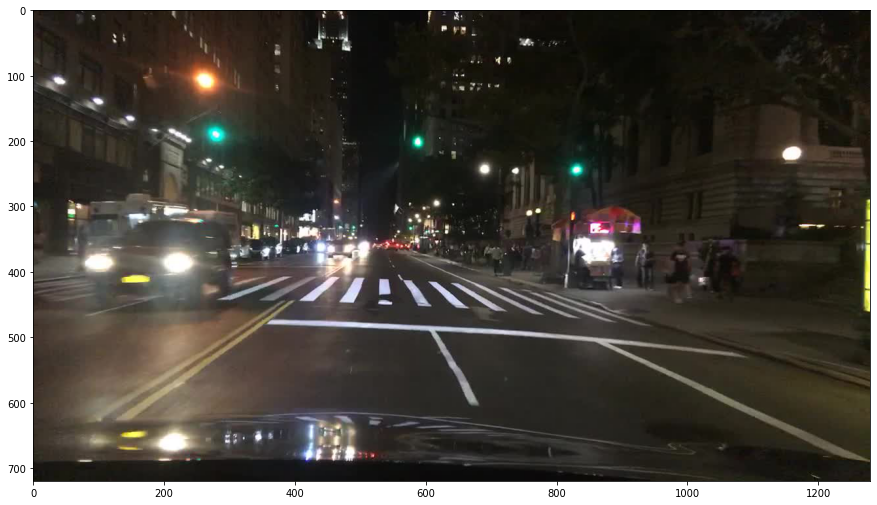

In [ ]:
test_img = plt.imread("../bdd100k/bdd100k/images/100k/train/" + person_img_names[randint(0, 1000)] + ".jpg")
plt.figure(figsize = (15, 10))
plt.imshow(test_img)

In [ ]:
# Generate sub-image data
count = 0

sub_names = []
sub_infor = []

for img_name in person_img_names:
    count += 1
    
    img_path = "../bdd100k/bdd100k/images/100k/train/" + img_name + ".jpg"
    xml_path = "../bdd100k/bdd100k/xml/train/" + img_name + ".xml"

    image = cv2.imread(img_path)

    img_info = []
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            img_info.append([obj_name, left, top, right, bottom])

    print("Img", count, "- Num of Objs: ", len(img_info))

    # Innitialize
    new_w = image.shape[1]//2
    new_h = image.shape[0]//2

    # Crop Image
    cropped_img_0 = image[0:new_h, 0:new_w]
    cropped_img_1 = image[0:new_h, image.shape[1]//2:image.shape[1]]
    cropped_img_2 = image[image.shape[0]//2:image.shape[0], 0:new_w]
    cropped_img_3 = image[image.shape[0]//2:image.shape[0], image.shape[1]//2:image.shape[1]]


    # TOP-LEFT
    new_img_info_0 = []

    for obj in img_info:
        x1 = int(obj[1])
        y1 = int(obj[2])
        
        if x1 < new_w and y1 < new_h:
            x2 = int(obj[3])
            y2 = int(obj[4])
            if x2 > new_w: x2 = new_w
            if y2 > new_h: y2 = new_h

            new_img_info_0.append([obj[0], x1, y1, x2, y2])

    # TOP-RIGHT
    new_img_info_1 = []

    for obj in img_info:
        x1 = int(obj[1]) - new_w
        x2 = int(obj[3]) - new_w
        y1 = int(obj[2])

        if x2 > 0 and y1 < new_h:
            if x1 < 0: x1 = 0
            y2 = int(obj[4])
            if y2 > new_h: y2 = new_h

            new_img_info_1.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-LEFT
    new_img_info_2 = []

    for obj in img_info:
        y1 = int(obj[2]) - new_h
        y2 = int(obj[4]) - new_h
        x1 = int(obj[1])

        if y2 > 0 and x1 < new_w:
            if y1 < 0: y1 = 0
            x2 = int(obj[3])
            if x2 > new_w: x2 = new_w

            new_img_info_2.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-RIGHT
    new_img_info_3 = []

    for obj in img_info:
        x1 = int(obj[1]) - new_w
        y1 = int(obj[2]) - new_h
        x2 = int(obj[3]) - new_w
        y2 = int(obj[4]) - new_h

        if x2 > 0 and y2 > 0:
            if x1 < 0: x1 = 0
            if y1 < 0: y1 = 0

            new_img_info_3.append([obj[0], x1, y1, x2, y2])

    for infor_i in new_img_info_0:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_0.jpg", cropped_img_0)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_0.txt", "w+")
            for infor in new_img_info_0: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_1:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_1.jpg", cropped_img_1)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_1.txt", "w+")
            for infor in new_img_info_1: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_2:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_2.jpg", cropped_img_2)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_2.txt", "w+")
            for infor in new_img_info_2: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_3:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_3.jpg", cropped_img_3)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_3.txt", "w+")
            for infor in new_img_info_3: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
    
    # if count == 10: break
    
print(count)

Img 1 - Num of Objs:  15
Img 2 - Num of Objs:  28
Img 3 - Num of Objs:  30
Img 4 - Num of Objs:  33
Img 5 - Num of Objs:  26
Img 6 - Num of Objs:  31
Img 7 - Num of Objs:  19
Img 8 - Num of Objs:  21
Img 9 - Num of Objs:  20
Img 10 - Num of Objs:  33
Img 11 - Num of Objs:  41
Img 12 - Num of Objs:  18
Img 13 - Num of Objs:  18
Img 14 - Num of Objs:  44
Img 15 - Num of Objs:  23
Img 16 - Num of Objs:  25
Img 17 - Num of Objs:  17
Img 18 - Num of Objs:  12
Img 19 - Num of Objs:  6
Img 20 - Num of Objs:  31
Img 21 - Num of Objs:  36
Img 22 - Num of Objs:  22
22


In [ ]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

In [ ]:
sub_img_src = glob.glob("./sub-images/*.jpg")
sub_txt_src = glob.glob("./sub-annotations/*.txt")

In [ ]:
sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 44


(360, 640, 3)


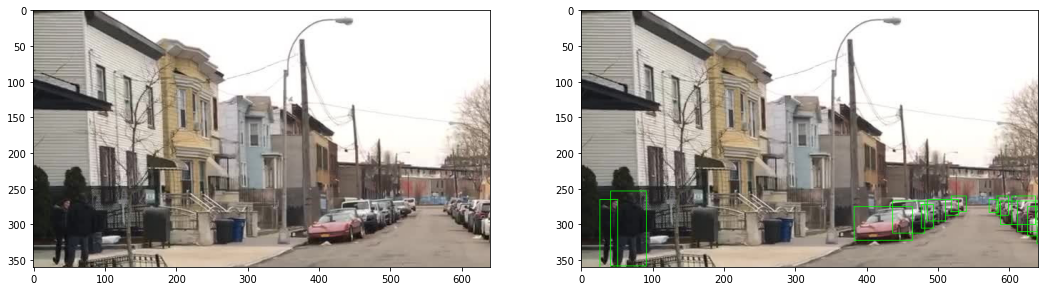

In [ ]:
sub_img_name = sub_img_names[randint(0, len(sub_img_names))]

test_sub_img = plt.imread("./sub-images/" + sub_img_name + ".jpg")
annotation = file_lines_to_list("./sub-annotations/" + sub_img_name + ".txt")

dymmy = test_sub_img.copy()
for obj in annotation:
    rec_img = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

print(test_sub_img.shape)
plt.figure(figsize = (18, 10))
plt.subplot(121), plt.imshow(test_sub_img)
plt.subplot(122), plt.imshow(dymmy)
plt.show()

In [ ]:
annotation = file_lines_to_list("./sub-annotations/" + sub_img_name + ".txt")
annotation

[['person', '41', '253', '91', '358'],
 ['person', '26', '265', '51', '360'],
 ['car', '518', '260', '539', '282'],
 ['car', '510', '265', '528', '287'],
 ['car', '485', '265', '510', '295'],
 ['car', '476', '272', '493', '305'],
 ['car', '436', '267', '481', '312'],
 ['car', '382', '275', '464', '322'],
 ['car', '571', '265', '584', '283'],
 ['car', '582', '260', '598', '287'],
 ['car', '587', '267', '611', '300'],
 ['car', '603', '260', '636', '300'],
 ['car', '611', '267', '640', '310'],
 ['car', '625', '275', '640', '316'],
 ['car', '638', '277', '640', '327']]

In [ ]:
label_names = ["BACKGROUND", "train", "truck", "traffic_light", "traffic_sign",
               "rider", "person", "bus", "bike", "car", "motor"]

In [ ]:
label_cnts = np.zeros(11)

for sub_anno in sub_txt_src:
    annotation = file_lines_to_list(sub_anno)
    
    for obj in annotation:
        for i in range(len(label_names)):
            if obj[0] == label_names[i]: label_cnts[i] += 1

In [ ]:
for i in range(len(label_names)):
    print(label_names[i], int(label_cnts[i]))

BACKGROUND 0
train 0
truck 12
traffic_light 45
traffic_sign 57
rider 4
person 144
bus 5
bike 8
car 200
motor 0


In [ ]:
sub_img_src = glob.glob("./sub-images/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 44


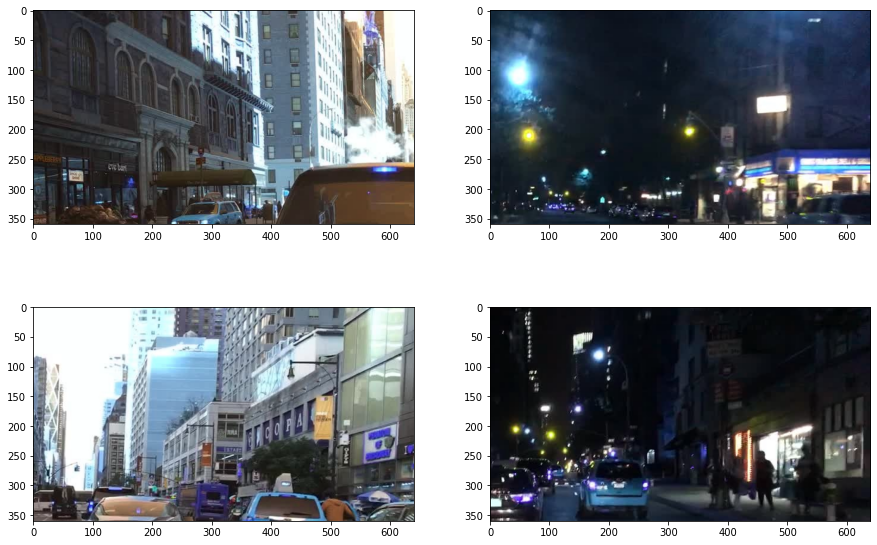

In [ ]:
# for i in range(len(sub_img_src)):
for a in range(1):
    i = randint(0, 1000)
    top_left = cv2.imread(sub_img_src[4*i])
    top_right = cv2.imread(sub_img_src[4*i + 1])
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    bot_right = cv2.imread(sub_img_src[4*i + 3])
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(top_left)
plt.subplot(222), plt.imshow(top_right)
plt.subplot(223), plt.imshow(bot_left)
plt.subplot(224), plt.imshow(bot_right)
plt.show()

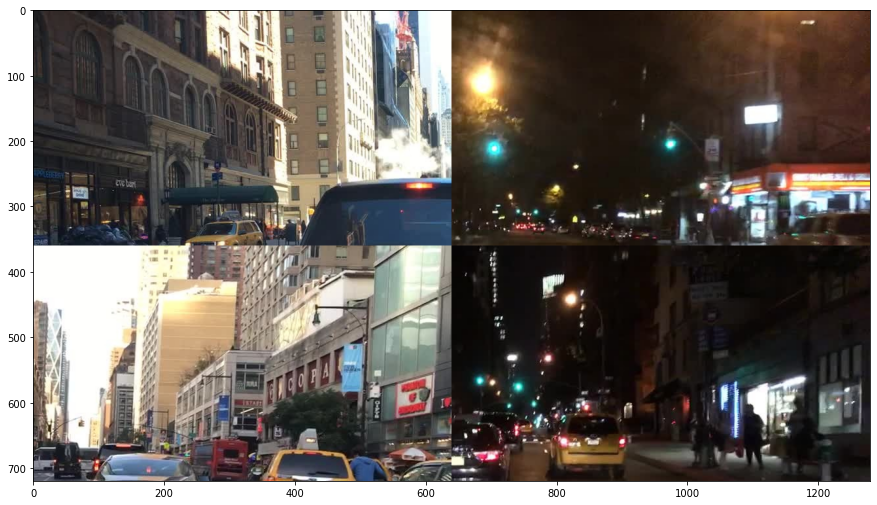

In [ ]:
top = np.hstack((top_left, top_right))
bot = np.hstack((bot_left, bot_right))
full = np.vstack((top, bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(full, cv2.COLOR_BGR2RGB))
plt.show()

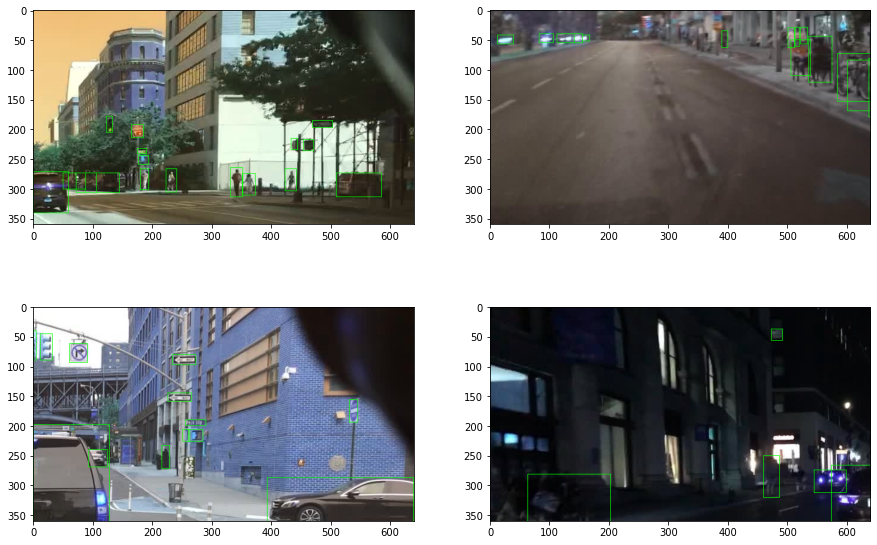

In [ ]:
# for i in range(len(sub_img_src)):
for a in range(1):
#     i = randint(0, 1000)
    
    top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i] + ".txt")
    dymmy = top_left.copy()
    for obj in anno:
        rec_tf = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 1] + ".txt")
    dymmy = top_right.copy()
    for obj in anno:
        rec_tr = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 2] + ".txt")
    dymmy = bot_left.copy()
    for obj in anno:
        rec_bl = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

    bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 3] + ".txt")
    dymmy = bot_right.copy()
    for obj in anno:
        rec_br = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(rec_tf)
plt.subplot(222), plt.imshow(rec_tr)
plt.subplot(223), plt.imshow(rec_bl)
plt.subplot(224), plt.imshow(rec_br)
plt.show()

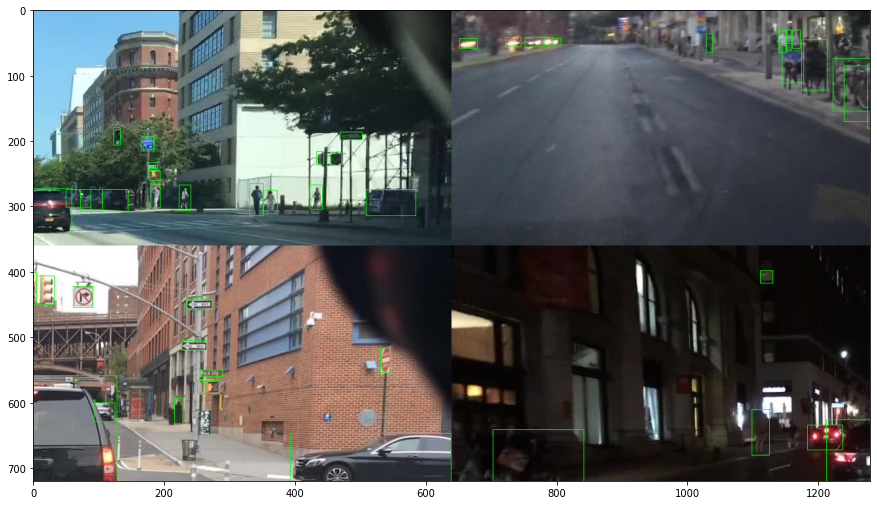

In [ ]:
reg_top = np.hstack((rec_tf, rec_tr))
reg_bot = np.hstack((rec_bl, rec_br))
reg_full = np.vstack((reg_top, reg_bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(reg_full, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cv2.imwrite("full_1.jpg", full)
cv2.imwrite("reg_full_1.jpg", reg_full)

True

In [ ]:
!pip install pascal_voc_writer
from pascal_voc_writer import Writer
from xml.etree.ElementTree import Element, SubElement, Comment, tostring, ElementTree

In [ ]:
name = sub_img_names[randint(0, 1000)]
info = file_lines_to_list("./sub-annotations/" + name + ".txt")
info

[['person', '196', '294', '223', '360'],
 ['person', '137', '289', '169', '360'],
 ['person', '117', '287', '139', '360'],
 ['person', '355', '307', '371', '334'],
 ['person', '387', '307', '398', '340'],
 ['person', '402', '301', '422', '340'],
 ['car', '616', '326', '638', '360'],
 ['car', '591', '306', '625', '360'],
 ['car', '520', '294', '608', '360'],
 ['car', '436', '289', '579', '360'],
 ['bus', '626', '306', '640', '348'],
 ['traffic_sign', '316', '205', '333', '245']]

In [ ]:
writer = Writer(name, 1280, 720)

for inf in info:
    if inf[0] == "traffic_light": inf[0] = "traffic light"
    if inf[0] == "traffic_sign": inf[0] = "traffic sign"
    writer.addObject(inf[0], inf[1], inf[2], inf[3], inf[4])
    
writer.save(name + '.xml')

In [ ]:
print(name)

000f157f-dab3a407_0


In [ ]:
def prettify(elem):
    """Return a pretty-printed XML string for the Element.
        """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="\t")

In [ ]:
sub_img_src = glob.glob("./sub-images/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 44


In [ ]:
def prettify(elem):
    """Return a pretty-printed XML string for the Element.
    """
    rough_string = tostring(elem, 'utf-8', method="xml")
    reparsed = xml.dom.minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent=" ")

In [ ]:
w_offset = 640
h_offset = 360

# for i in range(1):
for i in range(len(sub_img_src)//4):
    
    bbox = []
    
#     top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i] + ".txt")
    for obj in anno:
        bbox.append(obj)
    
#     top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 1] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        bbox.append([obj[0], x1, obj[2], x2, obj[4]])
    
#     bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 2] + ".txt")
    for obj in anno:
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], obj[1], y1, obj[3], y2])
        
#     bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 3] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], x1, y1, x2, y2])
    
#     top = np.hstack((top_left, top_right))
#     bot = np.hstack((bot_left, bot_right))
#     full = np.vstack((top, bot))
        
    bbox = np.array(bbox)  
    annotation = Element('annotation')
    
    for obj in bbox:
        if obj[0] == "traffic_light": obj[0] = "traffic light"
        if obj[0] == "traffic_sign": obj[0] = "traffic sign"
        
        SubElement(annotation, 'filename').text = sub_img_names[4*i] + "_stack.jpg"
        
        object_ = Element('object')
        SubElement(object_, 'name').text = obj[0]

        bndbox = Element('bndbox')
        SubElement(bndbox, 'xmin').text = obj[1]
        SubElement(bndbox, 'ymin').text = obj[2]
        SubElement(bndbox, 'xmax').text = obj[3]
        SubElement(bndbox, 'ymax').text = obj[4]

        object_.append(bndbox)

        annotation.append(object_)
        
    # Write Image
    cv2.imwrite("./new_person_samples/" + sub_img_names[4*i] + "_stack.jpg", full)
    
    # Write XML
    with open(osp.join("./new_person_xml/" + sub_img_names[4*i] + "_stack.xml"), 'w') as f:
        f.write(prettify(annotation))

    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [ ]:
# Write Text
text_file = open("aug_data_names.txt", "w+")
for i in range(len(sub_img_src)//4):
    print(sub_img_names[4*i] + "_stack", file=text_file)
text_file.close()

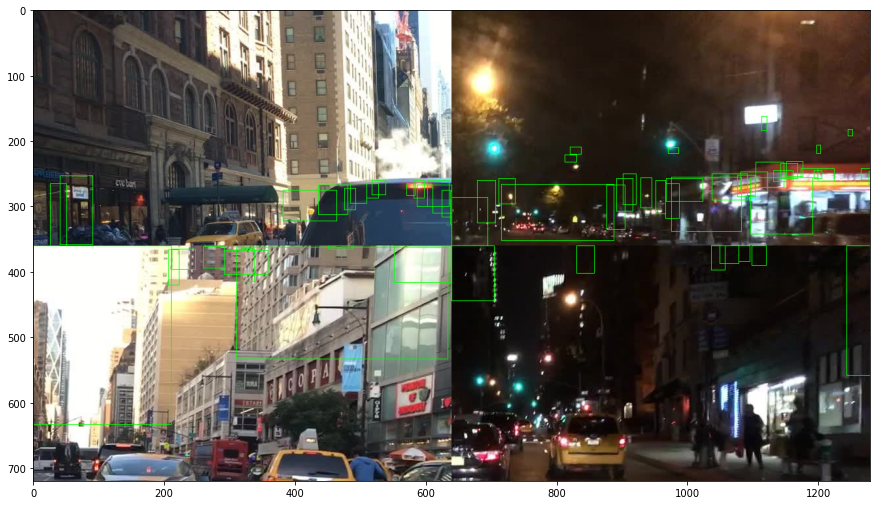

In [ ]:
dymmy = full.copy()

for obj in bbox:
    rec = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(rec, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cv2.imwrite("rec.jpg", rec)

True

In [ ]:
xml_src = glob.glob("./new_person_xml/*.xml")
# random.shuffle(sub_img_src)

xml_names = []

for xml in xml_src:

    xml_basename = os.path.basename(xml)
    xml_onlyname = os.path.splitext(xml_basename)

    xml_names.append(xml_onlyname[0])
    
print("Num of sub images:", len(xml_names))

Num of sub images: 11


In [ ]:
text_file = open("aug_data_names.txt", "w+")
for infor in xml_names: 
    print(infor, file=text_file)
text_file.close()

In [ ]:
import os
import os.path as osp

import json

from xml.etree.ElementTree import Element, SubElement
from xml.etree import ElementTree
from xml.dom import minidom

from PIL import Image

from tqdm import tqdm

In [ ]:
name = sub_img_names[randint(0, 1000)]
info = file_lines_to_list("./sub-annotations/" + name + ".txt")
info

[['person', '26', '0', '51', '1']]

In [ ]:
def prettify(elem):
    """Return a pretty-printed XML string for the Element.
        """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = xml.dom.minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="\t")

In [ ]:
def generate_xml(info):
    annotation = Element('annotation')
    for obj in info:

        object_ = Element('object')
        SubElement(object_, 'name').text = obj[0]

        bndbox = Element('bndbox')
        SubElement(bndbox, 'xmin').text = obj[1]
        SubElement(bndbox, 'ymin').text = obj[2]
        SubElement(bndbox, 'xmax').text = obj[3]
        SubElement(bndbox, 'ymax').text = obj[4]

        object_.append(bndbox)

        annotation.append(object_)

    with open(osp.join("xml_filename.xml"), 'w') as f:
        f.write(prettify(annotation))
    print(prettify(annotation))

In [ ]:
annotation = Element('annotation')
for obj in info:

    object_ = Element('object')
    SubElement(object_, 'name').text = obj[0]
    
    bndbox = Element('bndbox')
    SubElement(bndbox, 'xmin').text = obj[1]
    SubElement(bndbox, 'ymin').text = obj[2]
    SubElement(bndbox, 'xmax').text = obj[3]
    SubElement(bndbox, 'ymax').text = obj[4]

    object_.append(bndbox)
    
    annotation.append(object_)

with open(osp.join("xml_filename.xml"), 'w') as f:
    f.write(prettify(annotation))